# Final Project: N-Body - Thomas Vandal
This notebook displays the results of my N-Body final project in PHYS 512. No actual analysis is presented here since it is somewhat time consuming to perform, so I stored the results previously and show them here. The analysis files are [part1.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/part1.py), [part2.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/part2.py), [part3.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/part3.py), [part4.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/part4.py). However, most of code is contained in file [nbody.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/nbody.py), which defines a class (NBody) to perform N-Body simulations. More detail is given below. Useful plotting and I/O methods are defined in [utils.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/utils.py).

In [1]:
# Useful to display .gif files
from IPython.display import HTML
import utils as ut

## NBody Class
The NBody class uses particle mesh (PM) method to compute the potential for a given density grid. This density grid is computed with a nearest grid point (NGP) mass assignment scheme. The forces are computed by differentiating the potential in all directions and the forces are interpolated for each particle using the NGP scheme again, for consistency. Another mass assignment/interpolation scheme could be implemented, such as CIC, but NGP seems satisfying for this project, and it allows to minimize the number of operations per particle. Leapfrog integration is used to compute the velocity and position at each step. When calculating Green's function (potential for one particle in our convolution to obtain the potential grid), we use a softening constant passed as an argument to the NBody object as initialization. We also flip the Green's function in each corner to ensure periodicity. Periodic boundary conditions (BCs) are assumed by default, and non-periodic BCs can be enforced by setting the potential to 0 on the boundary, allowing no particles to be there at initialization.

This NBody implementation supports an arbitrary number of dimensions. I did some quick tests in 3D, but my desktop took too much time to compute it so I switched back to 2D for the following submission. Also, the NGP scheme is implemented using numpy methods instead of loops through particles, allowing to save computation time.

## Part 1
Here, we simply initializd a particle at rest to show it remains motionless. The total energy is very well conserved, as shown below. We also show an animation of the particle for 50 frames (not too many, too save space, but I tried for up to 1000 and it worked). The grid size was $2^6$, and the softening constant was $0.01$, as we can see in [part1.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/part1.py).

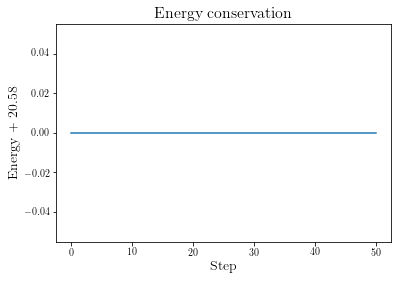

In [2]:
# display part 1
file1 = open('./energy/energy1.txt', 'r')
file1str = file1.read()
ut.eplot(file1str)
HTML('<img src="./gifs/fig1.gif">')

## Part 2
Here, we initialize two particles (e.g. stars) with opposite velocities perpendicular to their separation axis. With a bit of tuning, this corresponds to a nearly circular orbit. The total energy seems conserved, even though som very small variations occur. We also show an animation of the particle for 200 frames. By setting, the timestep to $5.0$, we can have more displacement, at the cost of some movement precision. The grid size was $2^9$, and the softening constant was $0.1$, as we can see in [part2.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/part2.py).

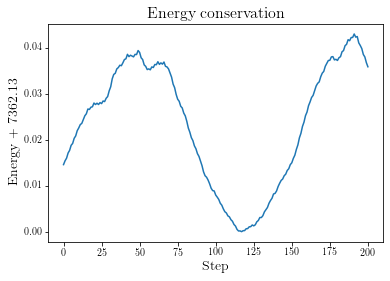

In [3]:
# display part 2
file2 = open('./energy/energy2.txt', 'r')
file2str = file2.read()
ut.eplot(file2str)
HTML('<img src="./gifs/fig2.gif">')

## Part 3
Here, we initialize a lot ($2^{17}$) of particles, at rest. The mass is scattered according to a random uniform disitribution, since all particles have equal masses and their positions are randomly scattered. We also show an animation of the particle for 400 frames (250 for non-periodic). By setting, the timestep to $100.0$, we have a system that is evolving faster, but the fine motions of individual particles are less precise when doing this. The grid size was $2^9$, and the softening constant was $1.0$, as we can see in [part3.py](https://github.com/tomvandal/phys512/blob/master/assignments/nbody/part3.py). I also tested this with a larger softening constant of $10$, which yielded similar resuts, but with less small-scale interractions. We will stick to a softening of $1.0$ for parts 3 and 4. To test both periodic and non-periodic boundary conditions, we simply change the "bc" argument in the script. Results for both are shown below.

### Periodic BCs
We use periodic BCs as described at the begining. We see that the particles tend to group in clusters, as expected. Until the form one big cluster at the end. We also see that some particles stay in the space be tween clusters. This tends to diminish, when increasing softening constant, and would probably be better with a smaller timestep, given more powerful computing resources. The total energy seems conserves, despite very small oscillations. However, I would expect it to blow up at some points, after all particles have collapsed together later in the simulation. There is a small trend toward increasing energy on long timescales.

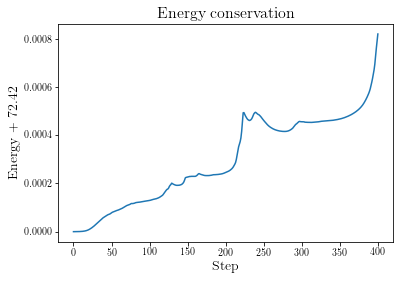

In [4]:
# display part 3, periodic BCs
file3per = open('./energy/energy3_per.txt', 'r')
file3perstr = file3per.read()
ut.eplot(file3perstr)
HTML('<img src="./gifs/fig3_per.gif">')

### Non-Periodic BCs
We use non-periodic BCs as described at the begining. We see that the particles tend to group in clusters, previously, but they now all collapse towards the center, since the space is closed. They then scatter (apparently) randomly. The total energy seems conserved at first, despite small oscillations, but it starts increasing faster at the end. The collapsing particles result in an instability when they scatter around after being very compact.

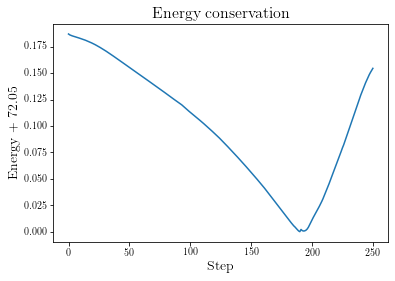

In [5]:
# display part 3, non-periodic BCs
file3nonper = open('./energy/energy3_nonper.txt', 'r')
file3nonperstr = file3nonper.read()
ut.eplot(file3nonperstr)
HTML('<img src="./gifs/fig3_nonper.gif">')

## Part 4
To start with scale invariant power spectrum, I followed the procedure from [this paper](https://cds.cern.ch/record/583256/files/0209590.pdf). I started by initializing randomly scattered masses as in part 3. I found $k$ everywhere on the grid with np.fft.rfftfreq. Then, I generated spatial mass variations with amplitudes drawn from a Rayleigh distribution with $\sigma^2 = P(k)$, and phases drawn from a uniform distribution between $0$ and $2\pi$. As given in the problem, the power spectrum was $P(k)=1/k^3$. Using the mass fluctuations obtain, we derive a new density for each cells and assign corresponding masses to each particles using an NGP-like scheme. These new masses are used for the remainder of the simulation.

With the same parameters as in part 3, we simulate a universe with a scale invariant power spectrum as described above. The main difference at early stages is that instead of being randomly and evenly scattered, there are some points with very intense mass densities and some points with much lower mass densities, as a result from the fluctuations we applied. Of course, the first clusters tend to form around these high-density regions, and then the system evolves in a similar manner to part 3, but with more compact cluster (with varying parameters, the particle seem to scatter away from the clusters, leaving a lot of particles between the more dense clusters...). In general, it seems that the system takes more time before all collapsing in one big cluster (possibly because of the higher density of each small cluster due to the mass fluctuations). 

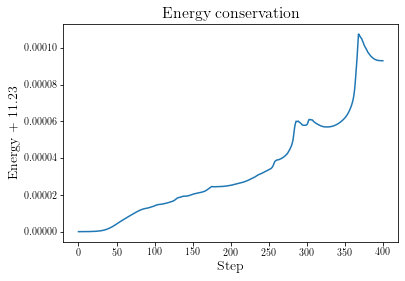

In [6]:
# display part 4
file4 = open('./energy/energy4.txt', 'r')
file4str = file4.read()
ut.eplot(file4str)
HTML('<img src="./gifs/fig4.gif">')